In [7]:
# Enforce pytorch version 1.6.0
'''import torch
if torch.__version__ != '1.6.0':
  !pip uninstall torch -y
  !pip uninstall torchvision -y
  !pip install torch==1.6.0
  !pip install torchvision==0.7.0

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi'''

Found existing installation: torch 1.9.0+cu102
Uninstalling torch-1.9.0+cu102:
  Successfully uninstalled torch-1.9.0+cu102
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 748.8 MB 16 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires torchvision, which is not installed.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


     |████████████████████████████████| 5.9 MB 15.8 MB/s 
1.6.0
10.2
Python 3.7.12
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:

# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

In [17]:
import torch
import torch_geometric
from torch_geometric.data import Data

In [41]:
edge_idx=torch.tensor([[0,1,1,2],
                       [1,0,2,1]],dtype=torch.long)
edge_atr=torch.tensor([[1,2],[3,4],[5,5.5],[1,1.9]],dtype=torch.long) #edge_attr (Tensor, optional) – Edge feature matrix with shape [num_edges, num_edge_features].

x=torch.tensor([[100],[200],[300]],dtype=torch.float)



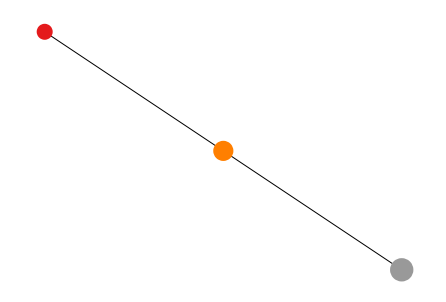

In [46]:
data=Data(x=x,edge_index=edge_idx,edge_attr=edge_atr)

import networkx as nx
import matplotlib.pyplot as plt

g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g,cmap=plt.get_cmap('Set1'),node_color = x,node_size=x,linewidths=6)


In [8]:
print(data.keys)

['x', 'edge_idx']


In [9]:
print(data['x'])

tensor([[-1],
        [ 0],
        [ 1]])


In [15]:
print('x' in data)
print('edge_attr' in data)  

True
True


In [49]:
device=torch.device('cpu')
data=data.to(device)

BenchMark Dataset

In [50]:
from torch_geometric.datasets import TUDataset

In [58]:
dataset=TUDataset(root='/tmp/ENzYMES',name='ENZYMES')

Data(edge_index=[2, 168], x=[37, 3], y=[1])
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
tensor([5])


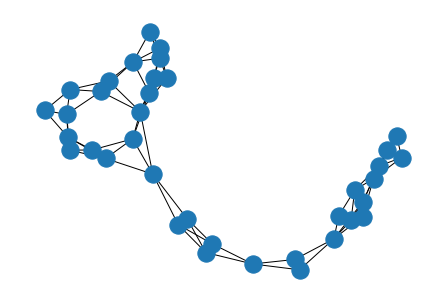

In [64]:
p=dataset[0]
print(p)
print(p.x)
print(p.y)
g = torch_geometric.utils.to_networkx(p, to_undirected=True)
nx.draw(g)

In [65]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [68]:
dataset.len()

1

In [70]:
dataset.num_classes

7

In [77]:
p=dataset[0]
print(p)
print(p.train_mask.sum())
print(p.val_mask.sum())
print(p.test_mask.sum())

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
tensor(140)
tensor(500)
tensor(1000)


In [82]:
p.test_mask.shape

torch.Size([2708])

## MiniBatch

In [83]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset=TUDataset(root='/tmp/ENZYMES',name="ENZYMES",use_node_attr=True)
loader=DataLoader(dataset,batch_size=32,shuffle=True)


Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [89]:
print(len(dataset))
print(dataset[0])

600
Data(edge_index=[2, 168], x=[37, 21], y=[1])


In [87]:
for batch_idx,data in enumerate(loader):
  if(batch_idx==1):
    print(data)
    
    break

Batch(edge_index=[2, 4008], x=[1013, 21], y=[32], batch=[1013], ptr=[33])


## Training

In [90]:
from torch_geometric.datasets import Planetoid


In [108]:
dataset=Planetoid(root='/tmp/Cora',name='Cora')
print(dataset.num_classes)
print(dataset.len())
print(dataset[0])
print(dataset[0].y.unique()) # there is only 1 graph ( dataset[0]), this graph has 2708 nodes. Each node is classified in either of the 7 categories

7
1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
tensor([0, 1, 2, 3, 4, 5, 6])


In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [124]:
class GCN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=GCNConv(dataset.num_node_features,16)
    self.conv2=GCNConv(16,dataset.num_classes)
  
  def forward(self,data):
    x,edge_idx=data.x,data.edge_index

    x=self.conv1(x,edge_idx)
    x=F.relu(x)
    x=F.dropout(x,training=self.training)
    x=self.conv2(x,edge_idx)

    return F.log_softmax(x,dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [129]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=GCN().to(device)
data=dataset[0].to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=5e-4)

model.train()
for epoch in range(1000):
  optimizer.zero_grad()
  score=model(data)
  loss=F.nll_loss(score[data.train_mask],data.y[data.train_mask])
  if(epoch%10 ==0):
    print(loss)
  loss.backward()
  optimizer.step()

tensor(1.9381, grad_fn=<NllLossBackward>)
tensor(1.8174, grad_fn=<NllLossBackward>)
tensor(1.6245, grad_fn=<NllLossBackward>)
tensor(1.4737, grad_fn=<NllLossBackward>)
tensor(1.2880, grad_fn=<NllLossBackward>)
tensor(1.1115, grad_fn=<NllLossBackward>)
tensor(0.9337, grad_fn=<NllLossBackward>)
tensor(0.9021, grad_fn=<NllLossBackward>)
tensor(0.7287, grad_fn=<NllLossBackward>)
tensor(0.6383, grad_fn=<NllLossBackward>)
tensor(0.5812, grad_fn=<NllLossBackward>)
tensor(0.4656, grad_fn=<NllLossBackward>)
tensor(0.4084, grad_fn=<NllLossBackward>)
tensor(0.3786, grad_fn=<NllLossBackward>)
tensor(0.3472, grad_fn=<NllLossBackward>)
tensor(0.2704, grad_fn=<NllLossBackward>)
tensor(0.2696, grad_fn=<NllLossBackward>)
tensor(0.2537, grad_fn=<NllLossBackward>)
tensor(0.2665, grad_fn=<NllLossBackward>)
tensor(0.2590, grad_fn=<NllLossBackward>)
tensor(0.2332, grad_fn=<NllLossBackward>)
tensor(0.2296, grad_fn=<NllLossBackward>)
tensor(0.1771, grad_fn=<NllLossBackward>)
tensor(0.1612, grad_fn=<NllLossBac

In [133]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7740
